In [66]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder
from sklearn.compose import make_column_transformer

In [67]:
print("Tensorflow version =",tf.__version__)
print("Pandas version =",pd.__version__)
print("Numpy version =",np.version.version)

Tensorflow version = 2.16.2
Pandas version = 2.2.2
Numpy version = 1.26.4


In [68]:
data = pd.read_csv("Regression/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [69]:
ct = make_column_transformer(
    (MinMaxScaler(), ["age","bmi","children"]),
    (OneHotEncoder(), ["sex","smoker","region"]),
)
data_train, data_test = train_test_split(data, test_size=0.2)

x_train_data = data_train.drop("charges", axis=1)
y_train_data = data_train["charges"]
x_test_data = data_test.drop("charges", axis=1)
y_test_data = data_test["charges"]
ct.fit(x_train_data)
x_train_transformed = ct.transform(x_train_data)
x_test_transformed = ct.transform(x_test_data)


In [70]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(11,name='hidden_layer0'),
    tf.keras.layers.Dense(500,name='hidden_layer1'),
    tf.keras.layers.Dense(500,name='hidden_layer2'),
    tf.keras.layers.Dense(500,name='hidden_layer6'),
    tf.keras.layers.Dense(10,name='hidden_layer7')
])

model.compile(loss=tf.keras.losses.MeanAbsoluteError() , optimizer=tf.keras.optimizers.Adam(learning_rate = 0.00005), metrics=["mae"])

In [71]:
history = model.fit(x_train_transformed, y_train_data, epochs=200, verbose=2)

Epoch 1/200
34/34 - 1s - 29ms/step - loss: 13046.7832 - mae: 13046.7832
Epoch 2/200
34/34 - 0s - 7ms/step - loss: 13043.9697 - mae: 13043.9697
Epoch 3/200
34/34 - 0s - 7ms/step - loss: 13035.5967 - mae: 13035.5967
Epoch 4/200
34/34 - 0s - 7ms/step - loss: 13012.8145 - mae: 13012.8145
Epoch 5/200
34/34 - 0s - 6ms/step - loss: 12959.7881 - mae: 12959.7881
Epoch 6/200
34/34 - 0s - 7ms/step - loss: 12852.6836 - mae: 12852.6836
Epoch 7/200
34/34 - 0s - 7ms/step - loss: 12657.0908 - mae: 12657.0908
Epoch 8/200
34/34 - 0s - 7ms/step - loss: 12329.5879 - mae: 12329.5879
Epoch 9/200
34/34 - 0s - 7ms/step - loss: 11814.9121 - mae: 11814.9121
Epoch 10/200
34/34 - 0s - 7ms/step - loss: 11087.1777 - mae: 11087.1777
Epoch 11/200
34/34 - 0s - 7ms/step - loss: 10245.0996 - mae: 10245.0996
Epoch 12/200
34/34 - 0s - 7ms/step - loss: 9411.5762 - mae: 9411.5762
Epoch 13/200
34/34 - 0s - 7ms/step - loss: 8691.5479 - mae: 8691.5479
Epoch 14/200
34/34 - 0s - 7ms/step - loss: 8241.4561 - mae: 8241.4561
Epoch 

In [72]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer0 (Dense)           │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer1 (Dense)           │ (None, 500)            │         6,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer2 (Dense)           │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer6 (Dense)           │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer7 (Dense)           │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,536,428 (5.86 MB)

 Trainable params: 512,142 (1.95 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,024,286 (3.91 MB)

In [73]:
model.evaluate(x_test_transformed, y_test_data)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3106.3813 - mae: 3106.3813 


[3726.905029296875, 3726.905029296875]

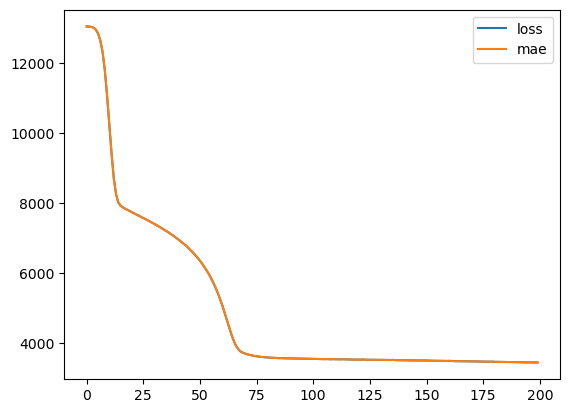

In [74]:
pd.DataFrame(history.history).plot()
plt.show()

In [76]:
model.save("Regression/Regression.keras")